In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
import warnings

In [182]:
warnings.filterwarnings('ignore')

### *Lets load the boston house price dataset*

In [3]:
from sklearn.datasets import load_boston

In [183]:
boston_df = load_boston()

In [5]:
boston_df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
#Description of the dataset
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df = pd.DataFrame(boston_df.data, columns= boston_df.feature_names)

In [27]:
df['price'] = boston_df.target

In [35]:
#Checking Na values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [36]:
##Checking null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

:Attribute Information (in order):
 *       - CRIM     per capita crime rate by town
 *       - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 *      - INDUS    proportion of non-retail business acres per town
 *       - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 *       - NOX      nitric oxides concentration (parts per 10 million)
 *       - RM       average number of rooms per dwelling
 *       - AGE      proportion of owner-occupied units built prior to 1940
 *       - DIS      weighted distances to five Boston employment centres
 *       - RAD      index of accessibility to radial highways
 *       - TAX      full-value property-tax rate per 10,000
 *       - PTRATIO  pupil-teacher ratio by town
 *       - B        1000(Bk - 0.63)2^ where Bk is the proportion of black people by town
 *       - LSTAT    % lower status of the population
 *       - MEDV     Median value of owner-occupied homes in $1000's

In [37]:
#Describer the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### EDA

In [55]:
##Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

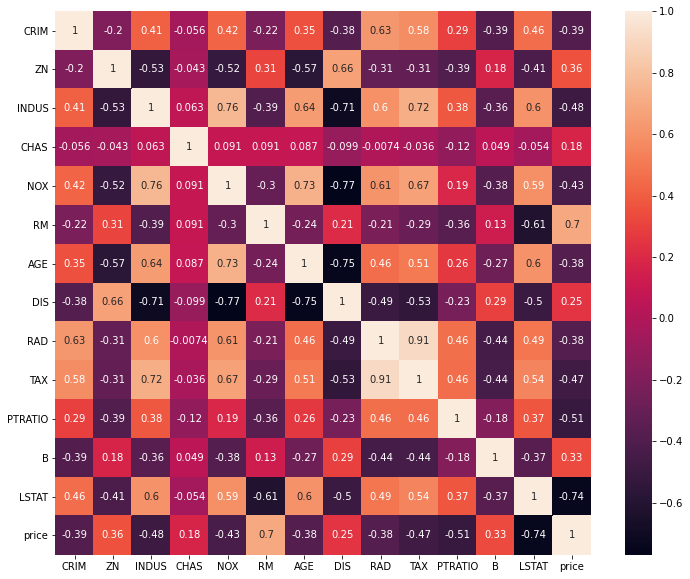

In [44]:
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(), annot= True)

In [57]:
df.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

Text(0, 0.5, 'LSTAT')

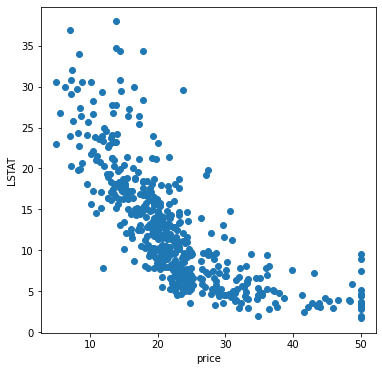

In [42]:
#Indivudual Correction
plt.figure(figsize= (6,6))
plt.scatter(df.price, df.LSTAT)
plt.xlabel('price')
plt.ylabel('LSTAT')

Text(0, 0.5, 'RM')

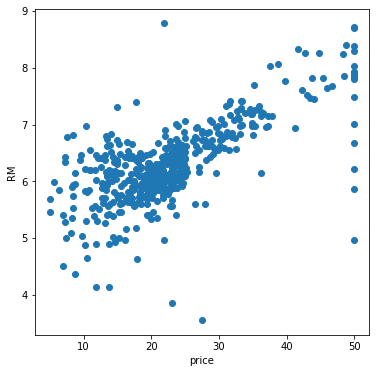

In [51]:
plt.figure(figsize= (6,6))
plt.scatter(df.price, df.RM)
plt.xlabel('price')
plt.ylabel('RM')

***If the RM(dwelling rooms) are increasing price of the property is also increasing(common sense).***

Text(0, 0.5, 'PTRATIO')

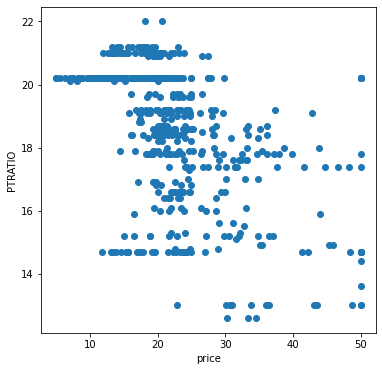

In [58]:
plt.figure(figsize= (6,6))
plt.scatter(df.price, df.PTRATIO)
plt.xlabel('price')
plt.ylabel('PTRATIO')

In [59]:
#Checking regression plot

<AxesSubplot:xlabel='RM', ylabel='price'>

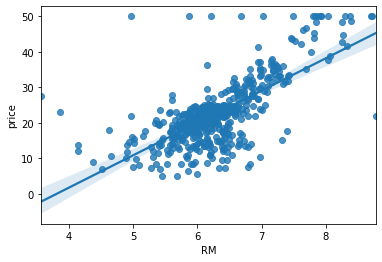

In [63]:
sns.regplot(x = 'RM',y = 'price', data = df)

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

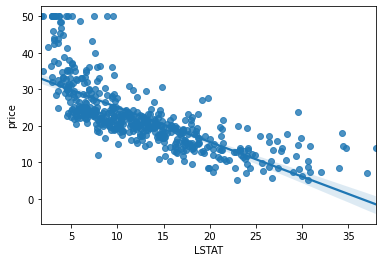

In [64]:
sns.regplot(x = 'LSTAT',y = 'price', data = df)

<AxesSubplot:xlabel='CHAS', ylabel='price'>

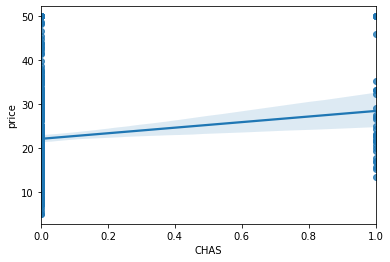

In [65]:
sns.regplot(x = 'CHAS',y = 'price', data = df)

<AxesSubplot:xlabel='PTRATIO', ylabel='price'>

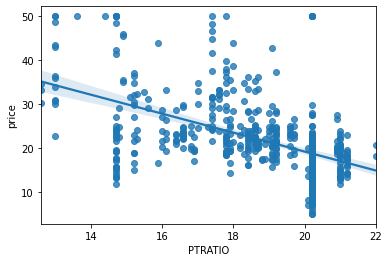

In [66]:
sns.regplot(x = 'PTRATIO',y = 'price', data = df)

In [68]:
##Checking VIF score to find multi-colinearity

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

In [105]:
vif

,variables,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


In [106]:
##Althoug the VIF score is quite high for few of the variables, but I will not drop it for now

In [107]:
#Defining dependent and independent variables

In [110]:
y = df.iloc[:,-1]
x = df.drop(columns= 'price')

In [111]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [112]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [114]:
##Train test split
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state= 1000)

In [118]:
#Standard scaling
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

In [120]:
x_train = scaler.fit_transform(x_train)

In [123]:
x_test = scaler.transform(x_test)

### Model training

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
l_reg  = LinearRegression()

In [128]:
reg_model = l_reg.fit(x_train,y_train)

In [129]:
reg_model

LinearRegression()

In [130]:
reg_model.coef_

array([-1.13163285,  1.39855091,  0.13003528,  0.60176259, -2.52451021,
        2.53611766,  0.08381189, -3.51611662,  2.61309067, -1.84070106,
       -2.41926259,  0.77739005, -3.63367992])

In [131]:
reg_model.intercept_

22.642216358839043

In [133]:
#Acurracy of the model
reg_model.score(x_test,y_test)

0.6620348653820163

In [135]:
##One which parameter the model is trained
reg_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [137]:
#Precting the value
reg_pred = reg_model.predict(x_test)

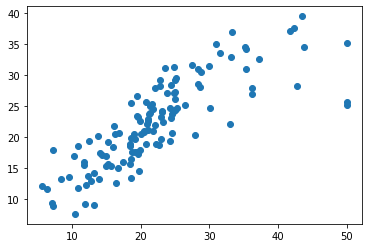

In [138]:
##Ploting the acutal value and predicted value
plt.scatter(y_test,reg_pred)

In [139]:
#Ploting of the residual
residual = y_test - reg_pred

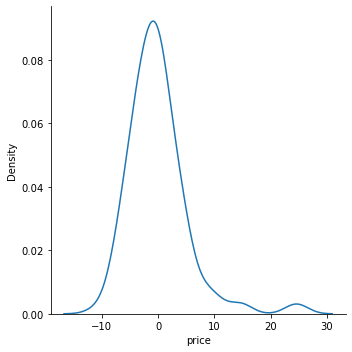

In [143]:
#Using distplot
sns.displot(residual, kind= 'kde')

***It is almost normally distributed***

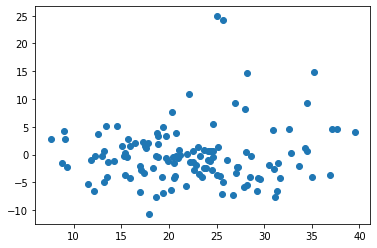

In [144]:
plt.scatter(reg_pred,residual)

***the residuals doesn't follow any patter, it show homoscedasticity***

In [145]:
##Acurracy test

In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [149]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.6242994351059337
28.01165462662788
5.292603766259844


In [168]:
##R square and adjusted r-square
from sklearn.metrics import r2_score

In [174]:
#r2
score = r2_score(y_test,reg_pred)
print(score)

0.6620348653820163


In [173]:
##Adjusted r-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6231539206914518

In [175]:
#Adjusted r2 would always be less the r2

In [178]:
boston_df.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [179]:
reg_model.predict(boston_df.data[0].reshape(1,-1))

array([-234.28898758])

#We are getting negative value because we have not scaled it

In [184]:
reg_model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

array([30.14005346])

#now getting the proper value

In [ ]:
##Pickle file for deployment

In [186]:
import pickle

In [188]:
pickle.dump(reg_model, open('regmodel.pkl','wb'))

In [189]:
my_model = pickle.load(open('regmodel.pkl','rb'))

In [190]:
my_model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

array([30.14005346])

### *This is awesome*

In [ ]:
##Now I will create an end to end project and deploy it into a cloud platform